<a href="https://colab.research.google.com/github/PGrubisic/Racunalni_vid_labovi/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Kreiram funkciju kojom ću prikazivati slike da ne moram stalno pisati isti kod
def prikazi(slika, naslov=""):
    if len(slika.shape) == 3:
        # Pretvaram iz BGR u RGB jer Matplotlib tako traži
        slika_rgb = cv.cvtColor(slika, cv.COLOR_BGR2RGB)
        plt.imshow(slika_rgb)
    else:
        # Ako je slika crno-bijela, koristim gray mapu
        plt.imshow(slika, cmap='gray')
    plt.title(naslov)
    plt.axis('off')
    plt.show()

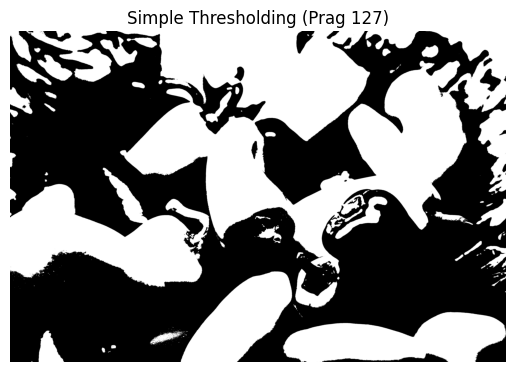

In [3]:
#učitavam sliku u grayscale modu (0 znači sivi tonovi)
#koristi sliku koja je uploadana prošli put
img = cv.imread('/content/test_slika.jpg', 0)

#primjenjujem fiksni prag od 127
# ret je izračunati prag, a thresh1 je rezultirajuća binarna slika
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

#prikazujem rezultat
prikazi(thresh1, "Simple Thresholding (Prag 127)")

Otsu je automatski odredio prag: 113.0


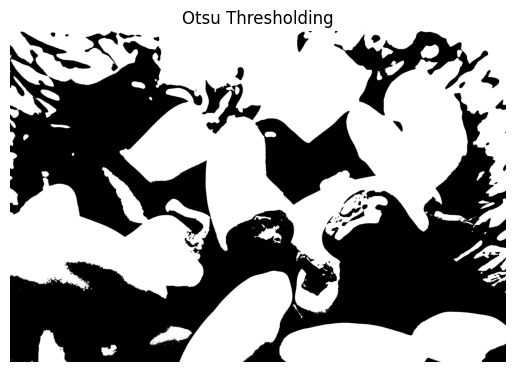

In [4]:
#koristim Otsu metodu koja automatski izračunava prag
# Primijeti cv.THRESH_OTSU zastavicu
ret_otsu, thresh_otsu = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

print(f"Otsu je automatski odredio prag: {ret_otsu}")
prikazi(thresh_otsu, "Otsu Thresholding")

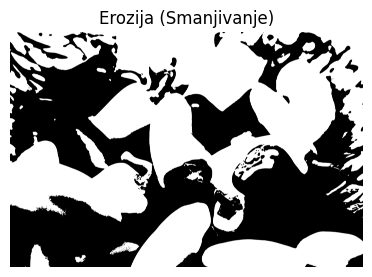

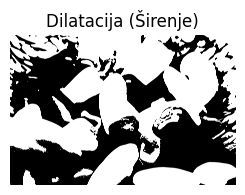

In [5]:
#Definiram kernel (strukturni element) veličine 5x5
kernel = np.ones((5,5), np.uint8)

#Primjenjujem eroziju - objekt na slici će se smanjiti
erozija = cv.erode(thresh_otsu, kernel, iterations = 1)

#Primjenjujem dilataciju - objekt na slici će se proširiti
dilatacija = cv.dilate(thresh_otsu, kernel, iterations = 1)

#Prikazujem usporedbu
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); prikazi(erozija, "Erozija (Smanjivanje)")
plt.subplot(1, 2, 2); prikazi(dilatacija, "Dilatacija (Širenje)")

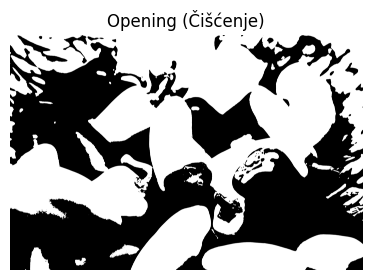

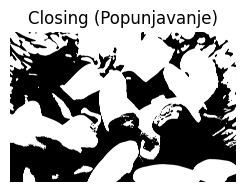

In [6]:
#Stvaram "šumovitu" binarnu sliku za test (dodajem malo bijelih mrlja)
noise = np.random.randint(0, 2, size=thresh_otsu.shape, dtype=np.uint8) * 255
noisy_thresh = cv.bitwise_or(thresh_otsu, noise)

#Primjenjujem MORPH_OPEN da očistim vanjski šum
opening = cv.morphologyEx(thresh_otsu, cv.MORPH_OPEN, kernel)

#Primjenjujem MORPH_CLOSE da popunim praznine unutar objekta
closing = cv.morphologyEx(thresh_otsu, cv.MORPH_CLOSE, kernel)

#Prikazujem rezultate
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); prikazi(opening, "Opening (Čišćenje)")
plt.subplot(1, 2, 2); prikazi(closing, "Closing (Popunjavanje)")